## NOTEBOOK 4
### Giorgio Stucchi - 969107

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
import seaborn as sns
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In this simulation, the dynamics of a system of 108 Argon particles at thermodynamic equilibrium in the solid, liquid, and gas phases are observed.

The simulation uses a molecular dynamics code that calculates the new position of the molecules by solving the equations of motion. The solver for the equations implements the Verlet algorithm.

The simulation program works in Lennard-Jones units, i.e., using $\sigma$ and $\epsilon$ as units of length and energy.

To convert quantities to SI units, they must be rescaled as follows:
* energy $E \rightarrow \epsilon E$
* length $l\rightarrow \sigma l^*$
* mass density $\rho \rightarrow m\sigma^{-3}\rho^*$
* temperature $T\rightarrow\frac{\epsilon}{k_B}T^*$

where the parameters with an asterisk are those provided in the exercise text to perform the simulation (contained in the input files).

The following values of the following quantities are also reported:
* $m=39.948$ amu
* $\sigma = 0.34$ nm
* $\frac{\epsilon}{k_B} = 120 K$

The equilibration process is the same for each of the three phases:

- the system is initialized through the Input() function, which, given a set of starting positions (a fcc lattice configuration is used) executes the following tasks: -set the system parameters; - randomly extract molecules velocity at $t=0$; - correct velocities so that the center of mass velocity is null -scales velocities to match a given temperature.

- the system is then simulated for a number of steps n by means of the Move() function based on the Verlet algorythm. We choose blocks of size 1 initially and graph the instantaneous value of the temperature, to observe how many steps are needed to reach stability (and in particular, to reach the target temperature). The number of these steps clearly differs for the 3 phases. In particular, 2000 steps are sufficient for solid and liquid phase, while for the gas phase a much greater 100000 steps are needed.
- in each subsequent simulation of the system (run of the program), there will be an initial cycle that implements the sufficient number of steps to achieve equilibration.

The parameters chosen for each phase are:

|            | Temp | rho  | r_cut | target Temp |
|------------|------|------|-------|-------------|
| **solid**  | 1.55  | 1.1  | 2.2  |     0.8     |
| **liquid** | 1.95  | 0.8  | 2.5  |     1.1     |
| **gas**    | 0.955 | 0.05 | 5.0  |     1.2     |

Lastly, to verify that a given set of parameters corresponds to a certain state of matter the positions of the particles are printed at different time steps and visualized with Ovito. The different behaviours that are observed agree with the expected phase. 

Once the system is equilibrated, average energy (kinetic, potential and total) and average temperature can be computed through the usual blocking method. Specifically, 20 blocks of 2000 steps are used. We also show a graph of the temperature that check its behaviour (namely, that it is constant after the equilibration has taken place)

**Liquid Phase Results**

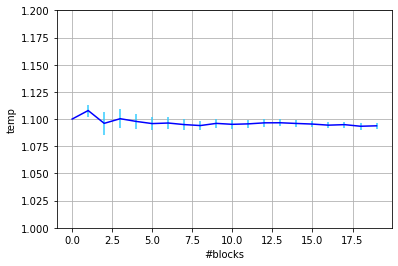

In [9]:
f, error = np.loadtxt("output_temp.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('temp')
plt.ylim(1., 1.2)
plt.grid(True)
plt.show()

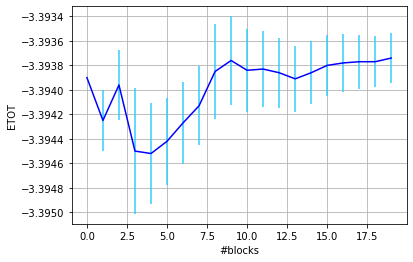

In [10]:
f, error = np.loadtxt("output_etot.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('ETOT')
plt.grid(True)
plt.show()

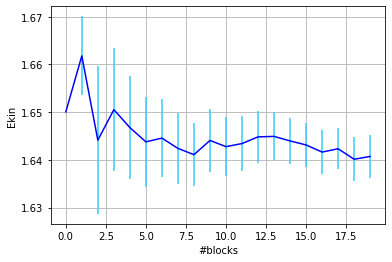

In [11]:
f, error = np.loadtxt("output_ekin.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Ekin')
plt.grid(True)
plt.show()

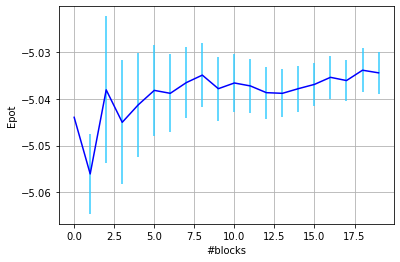

In [12]:
f, error = np.loadtxt("output_epot.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Epot')
plt.grid(True)
plt.show()

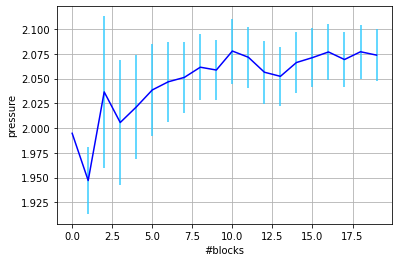

In [13]:
f, error = np.loadtxt("output_pres.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('pressure')
plt.grid(True)
plt.show()

**Solid Phase Results**

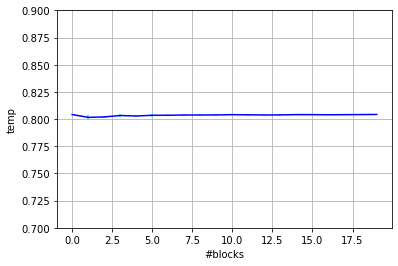

In [27]:
f, error = np.loadtxt("output_temp.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('temp')
plt.ylim(0.7, 0.9)
plt.grid(True)
plt.show()

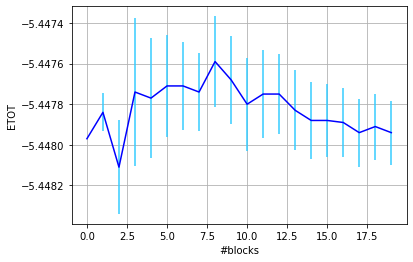

In [28]:
f, error = np.loadtxt("output_etot.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('ETOT')
plt.grid(True)
plt.show()

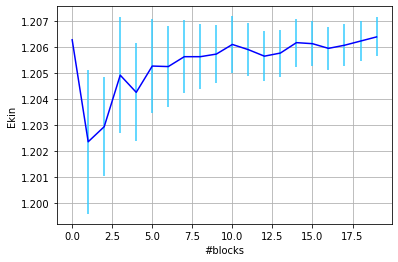

In [29]:
f, error = np.loadtxt("output_ekin.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Ekin')
plt.grid(True)
plt.show()

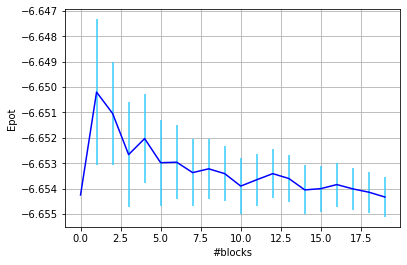

In [30]:
f, error = np.loadtxt("output_epot.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Epot')
plt.grid(True)
plt.show()

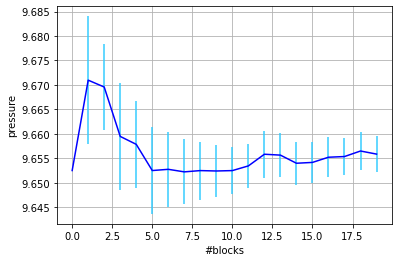

In [31]:
f, error = np.loadtxt("output_pres.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('pressure')
plt.grid(True)
plt.show()

**Gas Phase Results**

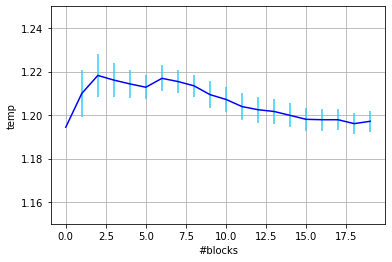

In [43]:
f, error = np.loadtxt("output_temp.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('temp')
plt.ylim(1.15, 1.25)
plt.grid(True)
plt.show()

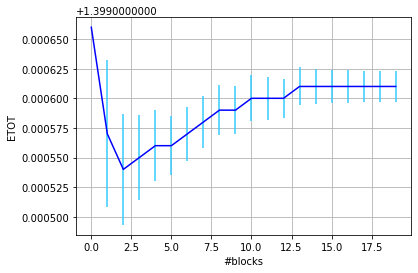

In [44]:
f, error = np.loadtxt("output_etot.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('ETOT')
plt.grid(True)
plt.show()

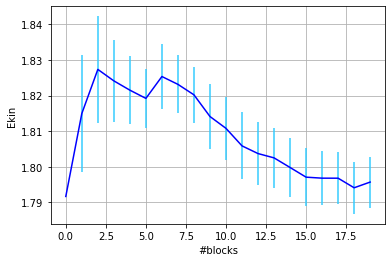

In [45]:
f, error = np.loadtxt("output_ekin.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Ekin')
plt.grid(True)
plt.show()

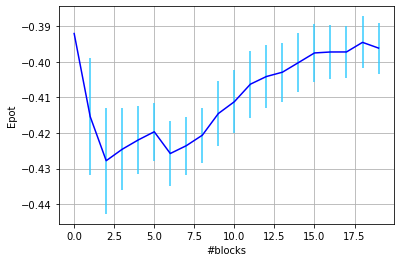

In [46]:
f, error = np.loadtxt("output_epot.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('Epot')
plt.grid(True)
plt.show()

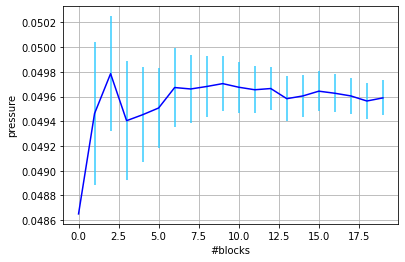

In [47]:
f, error = np.loadtxt("output_pres.dat", usecols=(2,3), unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.xlabel('#blocks')
plt.ylabel('pressure')
plt.grid(True)
plt.show()